In [2]:
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob

print(tf.__version__)

2.17.0


In [5]:
"""
csv_files = glob.glob('*.{}'.format('csv'),root_dir="./fonts")
for file in csv_files:
    df_csv_append = pd.read_csv("./fonts/" + file)
    df = pd.concat([df,df_csv_append], ignore_index=True)
"""
df = pd.read_csv("fonts-typography.csv")

In [6]:
df.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,AGENCY,AGENCY FB,64258,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
1,AGENCY,AGENCY FB,64257,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
2,AGENCY,AGENCY FB,61442,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
3,AGENCY,AGENCY FB,61441,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
4,AGENCY,AGENCY FB,9674,0.4,0,0.0,51,21,33,25,...,255,132,1,1,1,1,1,1,1,1


In [7]:
arr = np.array(df['font'])
classes = pd.unique(arr)
print(len(classes))

153


In [8]:
X = df.drop(columns=['font',"fontVariant","m_label","strength","italic","orientation","m_top","m_left","originalH","originalW","h","w"])
y = df['font']
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [10]:
X_train = np.array(X_train / 255.0)
X_test = np.array(X_test / 255.0)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 20, 20)
X_test = X_test.reshape(X_test.shape[0], 20, 20)

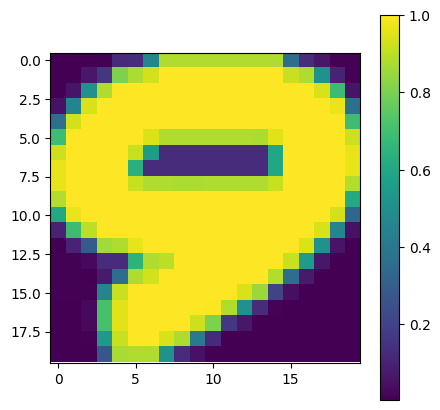

In [29]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(153)
])

In [51]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 17s 764us/step - accuracy: 0.3548 - loss: 2.9727
Epoch 2/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 16s 753us/step - accuracy: 0.4409 - loss: 2.4274
Epoch 3/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 14s 690us/step - accuracy: 0.4548 - loss: 2.3428
Epoch 4/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 15s 698us/step - accuracy: 0.4620 - loss: 2.2992
Epoch 5/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 14s 693us/step - accuracy: 0.4666 - loss: 2.2730
Epoch 6/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 15s 696us/step - accuracy: 0.4695 - loss: 2.2545
Epoch 7/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 15s 700us/step - accuracy: 0.4720 - loss: 2.2427
Epoch 8/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 15s 716us/step - accuracy: 0.4720 - loss: 2.2307
Epoch 9/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 15s 740us/step - accuracy: 0.4737 - loss: 2.2220
Epoch 10/10
20817/20817 ━━━━━━━━━━━━━━━━━━━━ 15s 717us/step - accuracy: 0.4752 - loss: 2.2199


In [53]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 

In [56]:
predictions = probability_model.predict(X_test)

5205/5205 ━━━━━━━━━━━━━━━━━━━━ 3s 583us/step


In [57]:
classes[np.argmax(predictions[2])]

'ARIAL'

In [58]:
classes[y_test[2]]

'ARIAL'